In [1]:
using DelimitedFiles
using PyCall
using PyPlot
using Statistics

In [2]:
cie = readdlm("../data/figures/data_fig2/cie_betalac")[:] ./log(2) 
cde_pse = readdlm("../data/figures/data_fig2/cde_pse")[:] ./log(2) 
cde_nat = readdlm("../data/figures/data_fig2/cde_NAT") ./log(2) 
entr = readdlm("../data/figures/data_fig2/evol_entr_betalac") ./log(2) 
X = readdlm("../data/figures/data_fig2/mcmc_steps_betalac")[:] 
cde_over_t = readdlm("../data/figures/data_fig2/cde_chains") ./log(2) 
#X = [n^(3.8) for n in 1:112] steps  of sampling

;


In [3]:
#betalac
mean_cde_over_t = reshape(mean(cde_over_t, dims = 2)[:], (30, 202))
std_cde_over_t = reshape(std(cde_over_t, dims = 2)[:], (30, 202))
;

In [4]:
epis= [x in sortperm(cie .- cde_pse, rev=true)[1:10] for x in 1:length(cie)]
d_from_neg_bisec = (cde_pse .+ cie .- 2) ./ sqrt(2)
varr = [x in sortperm(d_from_neg_bisec, rev=true)[1:10] for x in 1:length(cie)]
cons = [x in sortperm(d_from_neg_bisec, rev=false)[1:10] for x in 1:length(cie)]
println(sum(varr))
println(sum(epis))
println(sum(cons))

mask = zeros(112)
for i in 1:112
    if i < 8
        mask[i] = 1
    end
    if i < 20 && i > 8
        if i % 3 == 0
            mask[i] = 1
        end
    else
        if i % 5 == 0
            mask[i] = 1
        end
    end
end


mask = mask .== 1
;

10
10
10


## Fig. 2AB

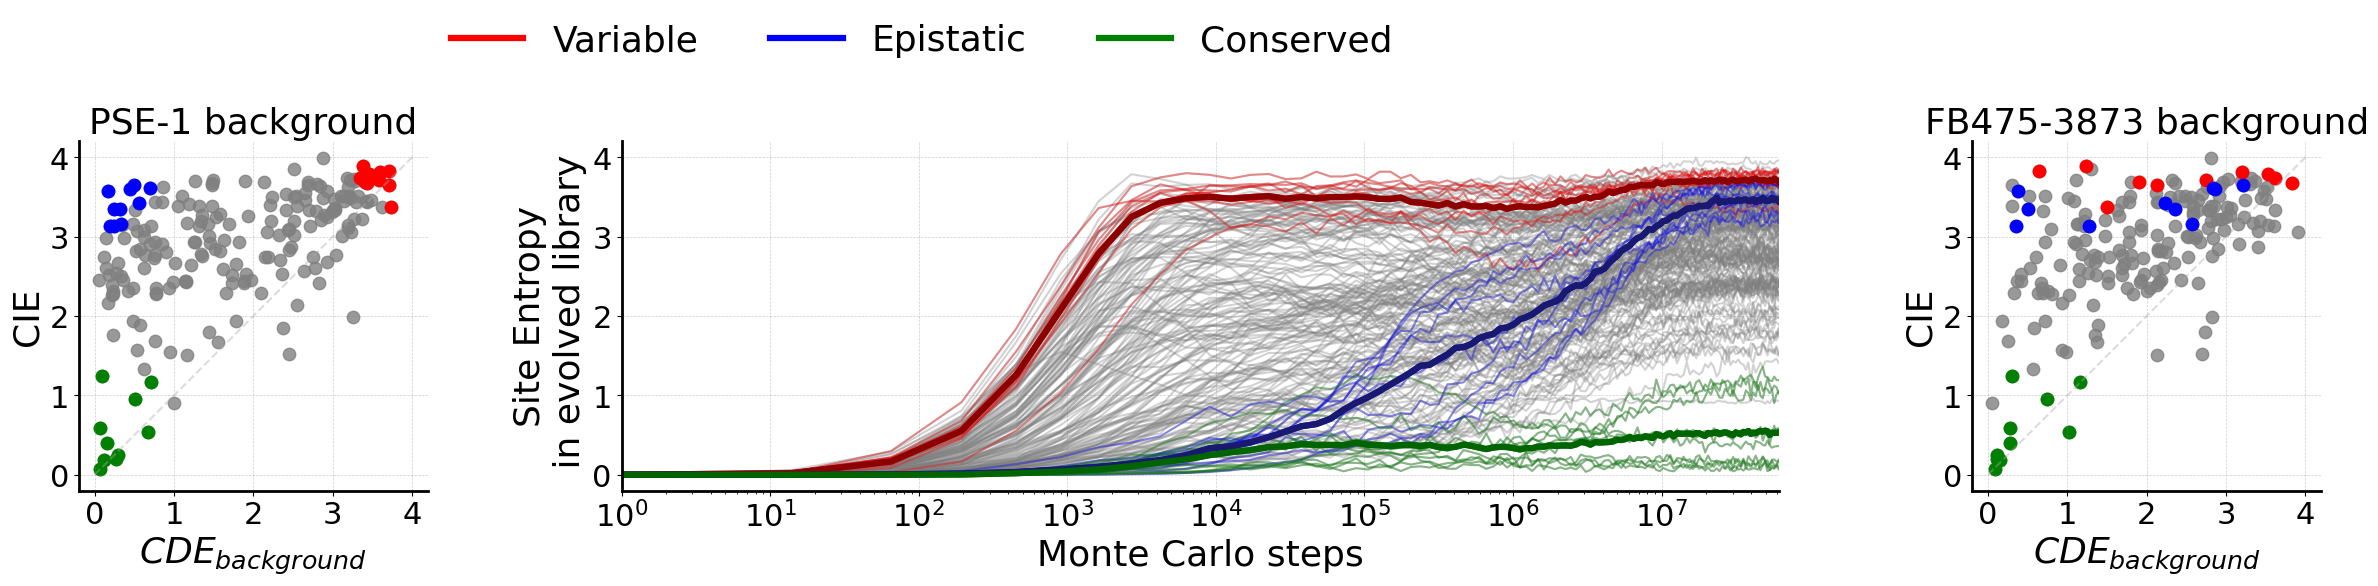

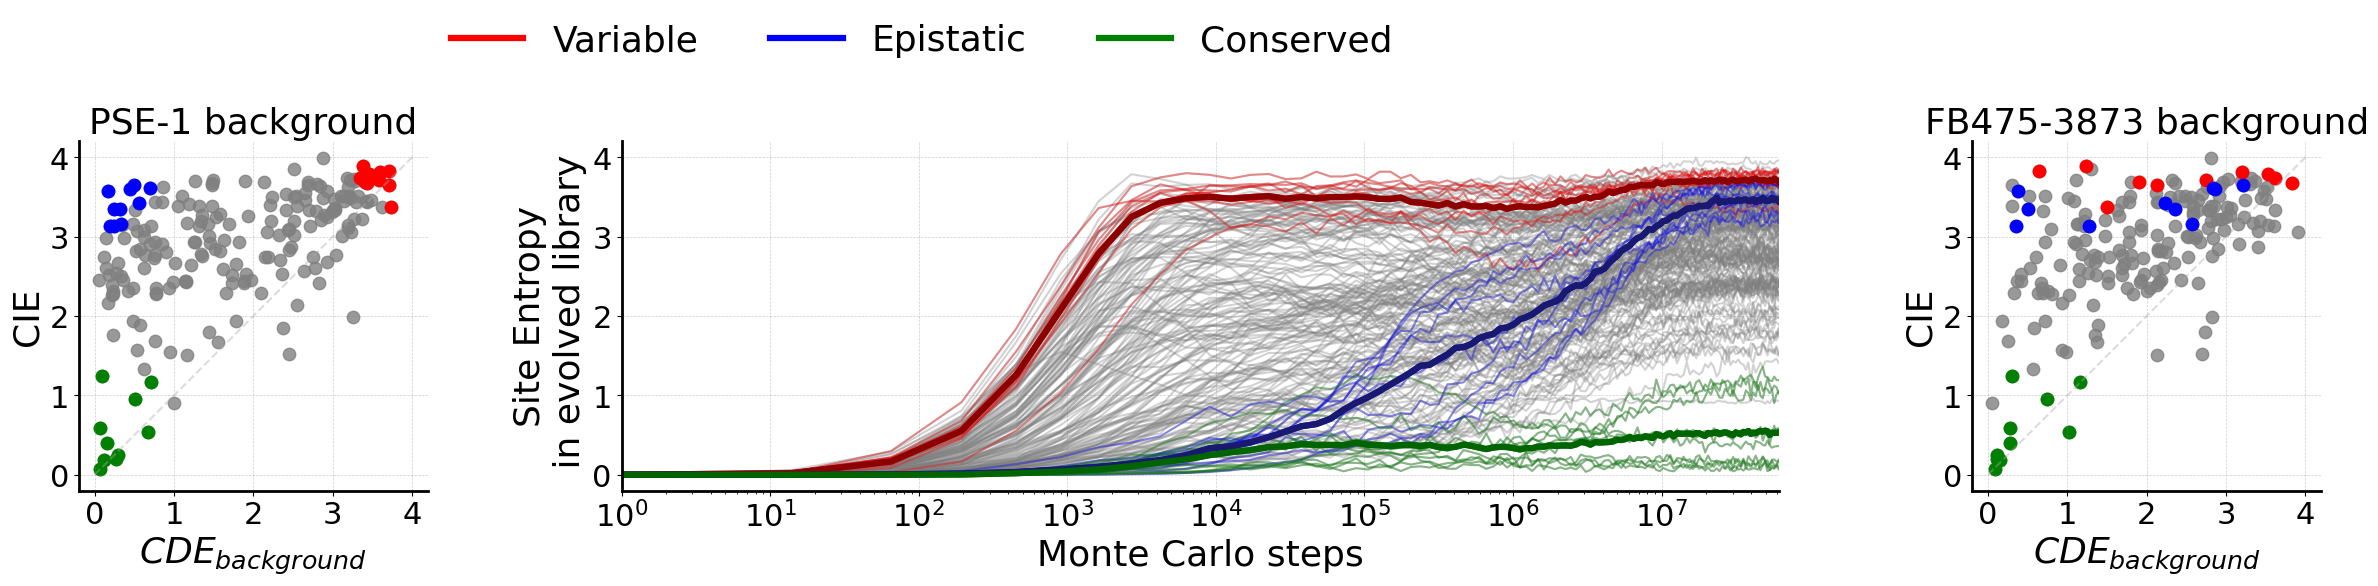

In [8]:
close("all")

pointsize = 80
transp = 0.8
transp2 = 1
lab = [0,1,2,3,4]
lab2 = [10^i for i in 2:7]
axis_width = 2.

ticks_font = 22
axis_font = 26

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(25)
 
ax1 = plt.subplot2grid(shape=(1, 4), loc=(0, 0), colspan = 1)
ax2 = plt.subplot2grid(shape=(1, 4), loc=(0, 1), colspan = 2)
ax3 = plt.subplot2grid(shape=(1, 4), loc=(0, 3), colspan = 1)

fig.subplots_adjust(wspace=0.2)

ax1.plot([0, 4.0], [0, 4.0], linestyle="--", alpha = 0.4, color = "darkgrey")
ax1.scatter(cde_pse, cie, color = "grey", s = pointsize, alpha = transp)
ax1.scatter(cde_pse[varr], cie[varr], color = "red", s = pointsize, alpha = transp2)
ax1.scatter(cde_pse[epis], cie[epis], color = "blue",  s = pointsize, alpha = transp2)
ax1.scatter(cde_pse[cons], cie[cons], color = "green",  s = pointsize, alpha = transp2)
ax1.set_xlabel("\$CDE_{background}\$", fontsize=axis_font)
ax1.set_ylabel("CIE", fontsize=axis_font)
ax1.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax1.set_xticks([0,1,2,3,4])
ax1.set_yticks([0,1,2,3,4])
ax1.set_xticklabels(lab, fontsize = ticks_font)
ax1.set_yticklabels(lab, fontsize = ticks_font)
ax1.spines["top"].set_visible(false)
ax1.spines["right"].set_visible(false)
ax1.spines["left"].set_linewidth(axis_width)
ax1.spines["bottom"].set_linewidth(axis_width)
ax1.set_aspect("equal")
ax1.set_title("PSE-1 background", fontsize = axis_font)

ax2.plot(X, entr, color = "grey", alpha = 0.35)
ax2.plot(X, entr[:, varr], color = "red", alpha = 0.35)
ax2.plot(X, entr[:, epis], color = "blue", alpha = 0.35)
ax2.plot(X, entr[:, cons], color = "green", alpha = 0.35)
ax2.plot(X, mean(entr[:, varr], dims = 2)[:], color = "red", linewidth=4.5, label = "Variable" )
ax2.plot(X, mean(entr[:, epis], dims = 2)[:], color = "blue", linewidth = 4.5, label = "Epistatic")
ax2.plot(X, mean(entr[:, cons], dims = 2)[:], color = "green", linewidth = 4.5, label = "Conserved")
ax2.plot(X, mean(entr[:, varr], dims = 2)[:], color = "darkred", linewidth=4.5 )
ax2.plot(X, mean(entr[:, epis], dims = 2)[:], color = "midnightblue", linewidth = 4.5)
ax2.plot(X, mean(entr[:, cons], dims = 2)[:], color = "darkgreen", linewidth = 4.5)
ax2.set_xlabel("Monte Carlo steps", fontsize=axis_font)
ax2.set_ylabel("Site Entropy\n in evolved library", fontsize=axis_font)
ax2.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax2.set_yticks([0,1,2,3,4])
ax2.set_xticks(lab2)
ax2.set_xticklabels(lab2, fontsize = ticks_font)
ax2.set_yticklabels(lab, fontsize = ticks_font)
ax2.set_xlim(minimum(X),maximum(X))
ax2.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_linewidth(axis_width)
ax2.spines["bottom"].set_linewidth(axis_width)
ax2.set_xscale("log")

other_cde = cde_nat[1,:]
ax3.plot([0, 4.0], [0, 4.0], linestyle="--", alpha = 0.4, color = "darkgrey")
ax3.scatter(other_cde, cie, color = "grey", s = pointsize, alpha = transp)
ax3.scatter(other_cde[varr], cie[varr], color = "red", s = pointsize, alpha = transp2)
ax3.scatter(other_cde[epis], cie[epis], color = "blue",  s = pointsize, alpha = transp2)
ax3.scatter(other_cde[cons], cie[cons], color = "green",  s = pointsize, alpha = transp2)
ax3.set_xlabel("\$CDE_{background}\$", fontsize=axis_font)
ax3.set_ylabel("CIE", fontsize=axis_font)
ax3.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax3.set_xticks([0,1,2,3,4])
ax3.set_yticks([0,1,2,3,4])
ax3.set_xticklabels(lab, fontsize = ticks_font)
ax3.set_yticklabels(lab, fontsize = ticks_font)
ax3.spines["top"].set_visible(false)
ax3.spines["right"].set_visible(false)
ax3.spines["left"].set_linewidth(axis_width)
ax3.spines["bottom"].set_linewidth(axis_width)
ax3.set_aspect("equal")
ax3.set_title("FB475-3873 background", fontsize = axis_font)
tight_layout()
fig.legend(loc="upper right", fontsize = axis_font, frameon = false, ncol = 3, bbox_to_anchor=(0.6, 1.2))

savefig(raw"../data/figures/new_2AB.png", dpi = 300, bbox_inches="tight")
gcf()

## Fig. 2D

In [5]:
m_cde_nat = mean(cde_nat, dims = 1)[:]
std_cde_nat = std(cde_nat, dims = 1)[:]
;

In [6]:

d_from_neg_bisec = (cde_pse .+ m_cde_nat .- 2) ./ sqrt(2)
println(argmin(m_cde_nat .- cde_pse)) #much more variable in pse, conserved in all others
println(argmax(d_from_neg_bisec)) #VARIABLE
println(argmax(m_cde_nat .- cde_pse)) #much more conserved in pse, variable in all others
println(argmin(d_from_neg_bisec)) #CONSERVED
;

18
45
99
179


In [7]:
d_from_neg_bisec = (cde_pse .+ m_cde_nat .- 2) ./ sqrt(2)
print("This site is variable for pse, conserved globally ")
println(argmin(m_cde_nat .- cde_pse))
print("CDE ")
println(cde_pse[argmin(m_cde_nat .- cde_pse)])
print("CIE ")
println(m_cde_nat[argmin(m_cde_nat .- cde_pse)])

print("This site is the most variable ")
println(argmax(d_from_neg_bisec))
print("CDE ")
println(cde_pse[argmax(d_from_neg_bisec)])
print("CIE ")
println(m_cde_nat[argmax(d_from_neg_bisec)])


This site is variable for pse, conserved globally 18
CDE 2.3697804099537536
CIE 0.7512629901301158
This site is the most variable 45
CDE 3.704876091688451
CIE 2.9318394403475767


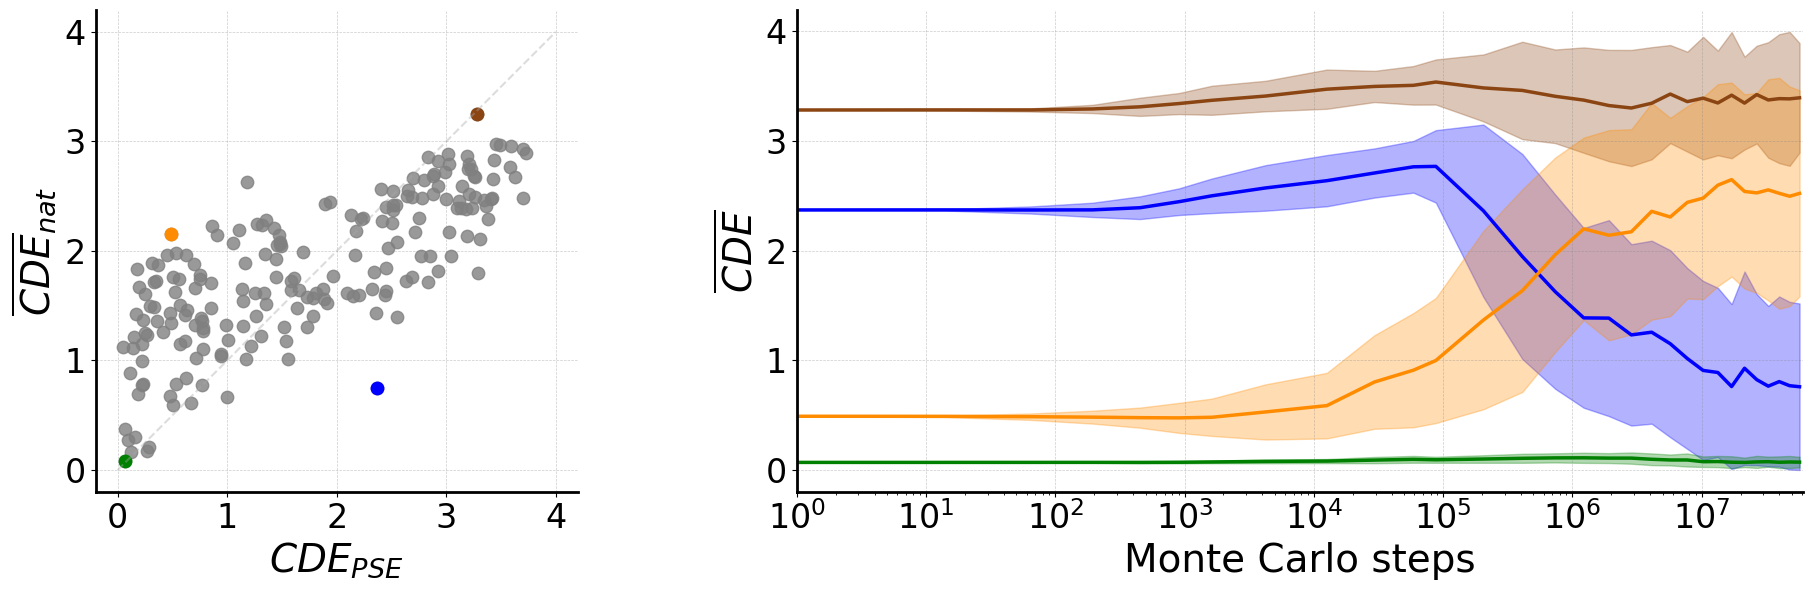

In [8]:
close("all")

pointsize = 80
transp = 0.8
transp2 = 1
d_from_neg_bisec = (cde_pse .+ m_cde_nat .- 2) ./ sqrt(2)
lab = [0,1,2,3,4]
lab2 = [10^i for i in 2:7]
axis_width = 2.

ticks_font = 24
axis_font = 28

fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(20)
 
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0), colspan = 1)
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1), colspan = 1)

fig.subplots_adjust(wspace=0.1)

ax1.plot([0, 4.0], [0, 4.0], linestyle="--", alpha = 0.4, color = "darkgrey")
ax1.scatter(cde_pse, m_cde_nat, color = "grey", s = pointsize, alpha = transp)
ax1.scatter(cde_pse[argmax(m_cde_nat)], m_cde_nat[argmax(m_cde_nat)], color = "saddlebrown", s = pointsize, alpha = transp2)
ax1.scatter(cde_pse[argmax(m_cde_nat .- cde_pse)], m_cde_nat[argmax(m_cde_nat .- cde_pse)], color = "darkorange",  s = pointsize, alpha = transp2)
ax1.scatter(cde_pse[argmin(d_from_neg_bisec)], m_cde_nat[argmin(d_from_neg_bisec)], color = "green",  s = pointsize, alpha = transp2 )
ax1.scatter(cde_pse[argmin(m_cde_nat .- cde_pse)], m_cde_nat[argmin(m_cde_nat .- cde_pse)], color = "blue",  s = pointsize, alpha = transp2 )
ax1.set_xticks([0,1,2,3,4])
ax1.set_yticks([0,1,2,3,4])
ax1.set_xticklabels(lab, fontsize = ticks_font)
ax1.set_yticklabels(lab, fontsize = ticks_font)
ax1.spines["top"].set_visible(false)
ax1.spines["right"].set_visible(false)
ax1.spines["left"].set_linewidth(axis_width)
ax1.spines["bottom"].set_linewidth(axis_width)
ax1.set_aspect("equal")
ax1.set_xlabel("\$CDE_{PSE}\$", fontsize=axis_font)
ax1.set_ylabel("\$\\overline{CDE}_{nat}\$", fontsize=axis_font)
ax1.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)


y1 = mean_cde_over_t[:, argmax(m_cde_nat)] #var
y2 = mean_cde_over_t[:, argmin(m_cde_nat .- cde_pse)] #much more variable in pse, conserved in all others
y3 = mean_cde_over_t[:, argmin(d_from_neg_bisec)]  #cons
y4 = mean_cde_over_t[:, argmax(m_cde_nat .- cde_pse)]  #much more conserved in pse, variable in all others

err_y1 = std_cde_over_t[:, argmax(d_from_neg_bisec)]
err_y2 = std_cde_over_t[:, argmin(m_cde_nat .- cde_pse)]
err_y3 = std_cde_over_t[:, argmin(d_from_neg_bisec)]
err_y4 = std_cde_over_t[:, argmax(m_cde_nat .- cde_pse)]

spessore = 2.5

ax2.plot(X[mask], y1, linewidth = spessore, color = "saddlebrown", label = "Most variable")
ax2.plot(X[mask], y2, linewidth = spessore, color = "blue", label = "Variable in PSE-1,\nconserved for all others")
ax2.plot(X[mask], y3, linewidth = spessore, color = "green", label = "Most conserved")
ax2.plot(X[mask], y4, linewidth = spessore, color = "darkorange", label = "Conserved in PSE-1,\nvariable for all others")
ax2.fill_between(X[mask], y1 .- err_y1, y1 .+ err_y1, alpha=0.3, color = "saddlebrown")
ax2.fill_between(X[mask], y2 .- err_y2, y2 .+ err_y2, alpha=0.3, color = "blue")
ax2.fill_between(X[mask], y3 .- err_y3, y3 .+ err_y3, alpha=0.3, color = "green")
ax2.fill_between(X[mask], y4 .- err_y4, y4 .+ err_y4, alpha=0.3, color = "darkorange")
ax2.grid(color = "grey", linestyle = "--", linewidth = 0.5, alpha = 0.4)
ax2.set_xlabel("Monte Carlo steps", fontsize=axis_font)
ax2.set_ylabel("\$\\overline{CDE}\$", fontsize=axis_font)
ax2.set_xticks(lab2)
ax2.set_yticks(lab)
ax2.set_xticklabels(lab2, fontsize = ticks_font)
ax2.set_yticklabels(lab, fontsize = ticks_font)
ax2.set_xlim(minimum(X),maximum(X))
ax2.spines["top"].set_visible(false)
ax2.spines["right"].set_visible(false)
ax2.spines["left"].set_linewidth(axis_width)
ax2.spines["bottom"].set_linewidth(axis_width)
ax2.set_xscale("log")

tight_layout()
#fig.legend(loc="upper right", fontsize = axis_font, frameon = false, ncol = 2, bbox_to_anchor=(0.8, 1.4))


savefig(raw"../data/figures/2CD.png", dpi = 300, bbox_inches="tight")
gcf()